**Machine Learning**

###### Predictive Models to apply: 
     
     - Random Forest;
     - Decision Tree;
     - Logistic Regression;
     - Support vector machines;
     - KNN;
     - Gaussian Process Classification;
     - Neural network models
     - AdaBoostClassifier
     - BaggingClassifier
     - ExtraTreesClassifier
     - GradientBoostingClassifier
     

In [1]:
import pandas as pd
import numpy as np

import time
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# ensemble models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV 

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, r2_score

## Importing the data

In [2]:
data = pd.read_csv('data_model.csv')
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,Range_age,ORD_AGE
0,20000.0,0,2,married,24,2,2,0,0,0,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,20-30,1
1,120000.0,0,2,single,26,0,2,0,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,20-30,1
2,90000.0,0,2,single,34,0,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,31-40,2
3,50000.0,0,2,married,37,0,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,31-40,2
4,50000.0,1,2,married,57,0,0,0,0,0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,51-60,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,married,39,0,0,0,0,0,...,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,31-40,2
29996,150000.0,1,3,single,43,0,0,0,0,0,...,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,41-50,3
29997,30000.0,1,2,single,37,4,3,2,0,0,...,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,31-40,2
29998,80000.0,1,3,married,41,1,0,0,0,0,...,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,41-50,3


In [3]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'Range_age', 'ORD_AGE'],
      dtype='object')

In [4]:
# One Hot Enconding
oneHot_data = pd.get_dummies(data['MARRIAGE'])
data_model = pd.merge(data, oneHot_data, left_index=True, right_index=True)
data_model.drop(columns = ['MARRIAGE','Range_age'], inplace=True)

In [5]:
data_model

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,ORD_AGE,married,other,single
0,20000.0,0,2,24,2,2,0,0,0,0,...,689.0,0.0,0.0,0.0,0.0,1,1,1,0,0
1,120000.0,0,2,26,0,2,0,0,0,2,...,1000.0,1000.0,1000.0,0.0,2000.0,1,1,0,0,1
2,90000.0,0,2,34,0,0,0,0,0,0,...,1500.0,1000.0,1000.0,1000.0,5000.0,0,2,0,0,1
3,50000.0,0,2,37,0,0,0,0,0,0,...,2019.0,1200.0,1100.0,1069.0,1000.0,0,2,1,0,0
4,50000.0,1,2,57,0,0,0,0,0,0,...,36681.0,10000.0,9000.0,689.0,679.0,0,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,39,0,0,0,0,0,0,...,20000.0,5003.0,3047.0,5000.0,1000.0,0,2,1,0,0
29996,150000.0,1,3,43,0,0,0,0,0,0,...,3526.0,8998.0,129.0,0.0,0.0,0,3,0,0,1
29997,30000.0,1,2,37,4,3,2,0,0,0,...,0.0,22000.0,4200.0,2000.0,3100.0,1,2,0,0,1
29998,80000.0,1,3,41,1,0,0,0,0,0,...,3409.0,1178.0,1926.0,52964.0,1804.0,1,3,1,0,0


## Resampling data

In [6]:
X = data_model.drop(columns=['default.payment.next.month'])
y = data_model['default.payment.next.month']

In [7]:
data_model['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [8]:
nm = NearMiss()

X_res, y_res = nm.fit_resample(X, y)

In [9]:
print('Original dataset shape', len(y))
print('Resample dataset shape', len(y_res))

Original dataset shape 30000
Resample dataset shape 13272


In [10]:
X_res['default'] = y_res

In [11]:
X_res

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,ORD_AGE,married,other,single,default
0,20000.0,1,2,24,2,2,4,4,4,4,...,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0
1,360000.0,1,2,42,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,3,1,0,0,0
2,360000.0,0,1,36,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,2,1,0,0,0
3,360000.0,0,2,34,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,2,0,0,1,0
4,360000.0,1,2,37,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13267,210000.0,1,2,34,3,2,2,2,2,2,...,0.0,0.0,0.0,0.0,0.0,2,1,0,0,1
13268,80000.0,1,2,34,2,2,2,2,2,2,...,3500.0,0.0,7000.0,0.0,4000.0,2,0,0,1,1
13269,30000.0,1,2,37,4,3,2,0,0,0,...,0.0,22000.0,4200.0,2000.0,3100.0,2,0,0,1,1
13270,80000.0,1,3,41,1,0,0,0,0,0,...,3409.0,1178.0,1926.0,52964.0,1804.0,3,1,0,0,1


## Splitting and scaling the Data

In [12]:
X = X_res.drop(columns=['default'])
y = X_res['default']

In [13]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(data_scaled, columns=X.columns)

In [14]:
X_scaled

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,ORD_AGE,married,other,single
0,-0.937413,1.186523,0.137731,-1.185650,1.461543,1.452146,3.526437,3.655499,3.864796,3.944644,...,-0.335083,-0.269810,-0.232245,-0.247170,-0.238128,-0.222181,-1.014815,-0.929963,-0.121476,0.957503
1,2.124044,1.186523,0.137731,0.669397,0.398370,-0.551793,-0.519629,-0.452788,-0.412520,-0.412595,...,-0.335083,-0.269810,-0.232245,-0.247170,-0.238128,-0.222181,1.004166,1.075312,-0.121476,-1.044384
2,2.124044,-0.842798,-1.184962,0.051048,-0.664804,-0.551793,-0.519629,-0.452788,-0.412520,-0.412595,...,-0.335083,-0.269810,-0.232245,-0.247170,-0.238128,-0.222181,-0.005324,1.075312,-0.121476,-1.044384
3,2.124044,-0.842798,0.137731,-0.155069,0.398370,-0.551793,-0.519629,-0.452788,-0.412520,-0.412595,...,-0.335083,-0.269810,-0.232245,-0.247170,-0.238128,-0.222181,-0.005324,-0.929963,-0.121476,0.957503
4,2.124044,1.186523,0.137731,0.154106,0.398370,-0.551793,-0.519629,-0.452788,-0.412520,-0.412595,...,-0.335083,-0.269810,-0.232245,-0.247170,-0.238128,-0.222181,-0.005324,1.075312,-0.121476,-1.044384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13267,0.773401,1.186523,0.137731,-0.155069,2.524716,1.452146,1.503404,1.601356,1.726138,1.766025,...,-0.335083,-0.269810,-0.232245,-0.247170,-0.238128,-0.222181,-0.005324,1.075312,-0.121476,-1.044384
13268,-0.397156,1.186523,0.137731,-0.155069,1.461543,1.452146,1.503404,1.601356,1.726138,1.766025,...,0.680659,0.146003,-0.232245,0.624671,-0.238128,0.192749,-0.005324,-0.929963,-0.121476,0.957503
13269,-0.847370,1.186523,0.137731,0.154106,3.587890,2.454116,1.503404,-0.452788,-0.412520,-0.412595,...,-0.335083,-0.269810,2.140396,0.275934,-0.004512,0.099390,-0.005324,-0.929963,-0.121476,0.957503
13270,-0.397156,1.186523,1.460424,0.566338,0.398370,-0.551793,-0.519629,-0.452788,-0.412520,-0.412595,...,12.129523,0.135192,-0.105201,-0.007289,5.948494,-0.035047,1.004166,1.075312,-0.121476,-1.044384


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=123)

X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

In [16]:
#original sample
Xo = data_model.drop(columns=['default.payment.next.month'])
yo = data_model['default.payment.next.month']

data_scaled_o = scaler.fit_transform(Xo)

X_scaled_o = pd.DataFrame(data_scaled_o, columns=X.columns)

Xo_train, Xo_test, yo_train, yo_test = train_test_split(X_scaled_o, yo, test_size=0.1, random_state=123)

Xo_train = pd.DataFrame(Xo_train, columns= X.columns)
Xo_test = pd.DataFrame(Xo_test, columns= X.columns)

## Machine Learning Models

### Decision Tree

In [17]:
for d in range (10,50):
    classifier = DecisionTreeClassifier(max_depth=d, random_state=123)
    classifier.fit(X_train, y_train)
    predictions_dt = classifier.predict(X_test)
    print('accuracy score =', accuracy_score(y_true = y_test, y_pred = predictions_dt), ' |max depth = ', d)

accuracy score = 0.7462349397590361  |max depth =  10
accuracy score = 0.7447289156626506  |max depth =  11
accuracy score = 0.7394578313253012  |max depth =  12
accuracy score = 0.7311746987951807  |max depth =  13
accuracy score = 0.7304216867469879  |max depth =  14
accuracy score = 0.7274096385542169  |max depth =  15
accuracy score = 0.7281626506024096  |max depth =  16
accuracy score = 0.7266566265060241  |max depth =  17
accuracy score = 0.7206325301204819  |max depth =  18
accuracy score = 0.7100903614457831  |max depth =  19
accuracy score = 0.7168674698795181  |max depth =  20
accuracy score = 0.7078313253012049  |max depth =  21
accuracy score = 0.7123493975903614  |max depth =  22
accuracy score = 0.7198795180722891  |max depth =  23
accuracy score = 0.6942771084337349  |max depth =  24
accuracy score = 0.6859939759036144  |max depth =  25
accuracy score = 0.6987951807228916  |max depth =  26
accuracy score = 0.697289156626506  |max depth =  27
accuracy score = 0.6890060240

0.6875


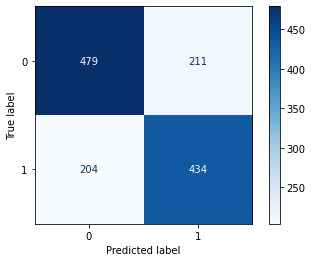

In [18]:
dt = DecisionTreeClassifier(max_depth=33, random_state=123)
dt.fit(X_train, y_train)
predictions_dt = dt.predict(X_test)
print(accuracy_score(y_true = y_test, y_pred = predictions_dt))
plot_confusion_matrix(dt, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

### Random Forest

In [19]:
random_forest = RandomForestClassifier()

n_est = [10, 50, 100, 200]
max_depth_opt = [5, 10, 25, 50]
param_grid = dict(n_estimators = n_est, max_depth=max_depth_opt)

start = time.time()
rd_grid = GridSearchCV(random_forest, param_grid, cv = 5, scoring='accuracy', n_jobs=-1).fit(X_train, y_train)
elapsed_time = time.time()-start
print("Finished iterating in: {} seconds".format(str(int(elapsed_time))))
print(rd_grid.best_score_, rd_grid.best_params_)

Finished iterating in: 117 seconds
0.7669125591681022 {'max_depth': 25, 'n_estimators': 200}


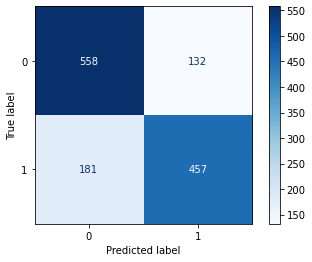

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       690
           1       0.78      0.72      0.74       638

    accuracy                           0.76      1328
   macro avg       0.77      0.76      0.76      1328
weighted avg       0.77      0.76      0.76      1328



In [20]:
clf=RandomForestClassifier(n_estimators= 200, max_depth=50)
clf.fit(X_train,y_train)
predictions_rf = clf.predict(X_test)
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

'''plot_confusion_matrix(
    estimator,
    X,
    y_true,
    *,
    labels=None,
    sample_weight=None,
    normalize=None,
    display_labels=None,
    include_values=True,
    xticks_rotation='horizontal',
    values_format=None,
    cmap='viridis',
    ax=None,
)'''
print(metrics.classification_report(y_test, predictions_rf))

### Logistic Regression

In [21]:
logreg = LogisticRegression(random_state=123, max_iter=100).fit(X_train, y_train)
predictions_logreg = logreg.predict(X_test)
print('accuracy score =', accuracy_score(y_true = y_test, y_pred = predictions_logreg))

accuracy score = 0.7522590361445783


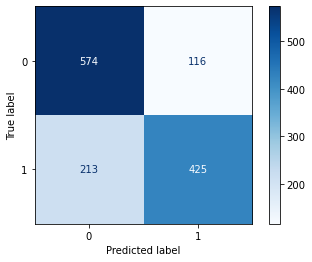

In [22]:
plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

### Support Vector Machines (SVM)

In [23]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
predictions_svm = svm_model.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions_svm)

0.7454819277108434

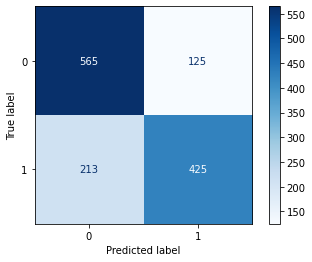

In [24]:
plot_confusion_matrix(svm_model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

###  K Neighbors Classifier (KNN)

In [25]:
for n in range (20,80):
    neigh = KNeighborsClassifier(n_neighbors=n, weights='distance')
    neigh.fit(X_train, y_train)
    predictions_knn = neigh.predict(X_test)
    print('score =', accuracy_score(y_true = y_test, y_pred = predictions_knn), 'n =',n)

score = 0.7085843373493976 n = 20
score = 0.7123493975903614 n = 21
score = 0.7123493975903614 n = 22
score = 0.7131024096385542 n = 23
score = 0.713855421686747 n = 24
score = 0.7108433734939759 n = 25
score = 0.7131024096385542 n = 26
score = 0.713855421686747 n = 27
score = 0.7131024096385542 n = 28
score = 0.7131024096385542 n = 29
score = 0.7123493975903614 n = 30
score = 0.7131024096385542 n = 31
score = 0.7131024096385542 n = 32
score = 0.7123493975903614 n = 33
score = 0.7123493975903614 n = 34
score = 0.713855421686747 n = 35
score = 0.7146084337349398 n = 36
score = 0.7146084337349398 n = 37
score = 0.7153614457831325 n = 38
score = 0.7146084337349398 n = 39
score = 0.7146084337349398 n = 40
score = 0.7168674698795181 n = 41
score = 0.713855421686747 n = 42
score = 0.713855421686747 n = 43
score = 0.7161144578313253 n = 44
score = 0.7146084337349398 n = 45
score = 0.7153614457831325 n = 46
score = 0.7146084337349398 n = 47
score = 0.7146084337349398 n = 48
score = 0.713855421

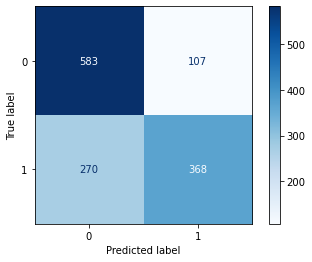

In [26]:
neigh = KNeighborsClassifier(n_neighbors= 44, weights='distance')
neigh.fit(X_train, y_train)
predictions_knn = neigh.predict(X_test)
plot_confusion_matrix(neigh, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

### Gaussian Process Classification

In [27]:
kernel = RBF()

gpc = GaussianProcessClassifier(kernel=kernel,n_jobs=100,
             random_state=123).fit(X_train.sample(1000), y_train.sample(1000))

predictions_gpc = gpc.predict(X_test)

print('score =', accuracy_score(y_true = y_test, y_pred = predictions_gpc))



score = 0.5188253012048193


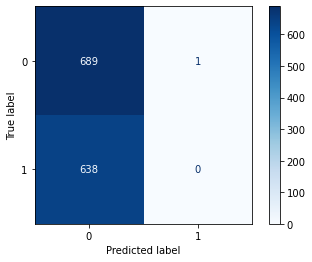

In [28]:
plot_confusion_matrix(gpc, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

### Neural Network Models

In [29]:
nnm = MLPClassifier()

nnm.fit(X_train, y_train)

predictions_nnm = nnm.predict(X_test)
print('score =', accuracy_score(y_true = y_test, y_pred = predictions_nnm))

score = 0.7628012048192772


C:\Users\Filipe Miguel Santos\anaconda3\envs\main\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


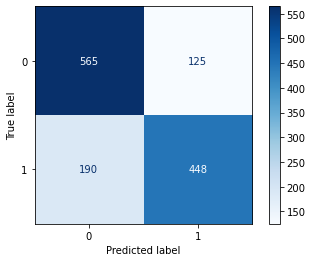

In [30]:
plot_confusion_matrix(nnm, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

### AdaBoostClassifier

In [31]:
for e in [10,20,50,100]:
    adc = AdaBoostClassifier(n_estimators=e, random_state=123)
    adc.fit(X_train, y_train)
    predictions_adc = adc.predict(X_test)
    print('score =', accuracy_score(y_true = y_test, y_pred = predictions_adc), e)

score = 0.75 10
score = 0.7537650602409639 20
score = 0.7650602409638554 50
score = 0.7635542168674698 100


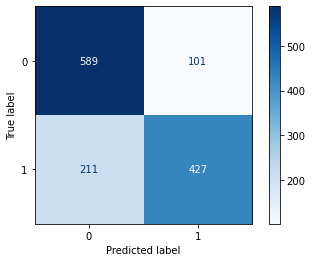

In [32]:
adc = AdaBoostClassifier(n_estimators=50, random_state=123)
adc.fit(X_train, y_train)
predictions_adc = adc.predict(X_test)
plot_confusion_matrix(adc, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

### BaggingClassifier

In [33]:
bc = BaggingClassifier(base_estimator=None,
                         n_estimators=50, random_state=123).fit(X_train, y_train)
predictions_bc = bc.predict(X_test)
print('score =', accuracy_score(y_true = y_test, y_pred = predictions_bc))

score = 0.7628012048192772


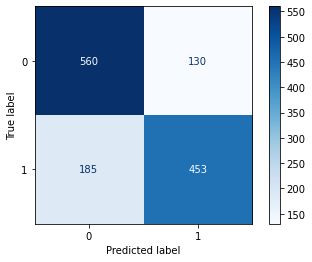

In [34]:
plot_confusion_matrix(bc, X_test, y_test, cmap=plt.cm.Blues)  
plt.show() 

### ExtraTreesClassifier

In [35]:
etc = ExtraTreesClassifier(n_estimators=100, random_state=123)
etc.fit(X_train, y_train)
predictions_etc = etc.predict(X_test)
print('score =', accuracy_score(y_true = y_test, y_pred = predictions_etc))

score = 0.7552710843373494


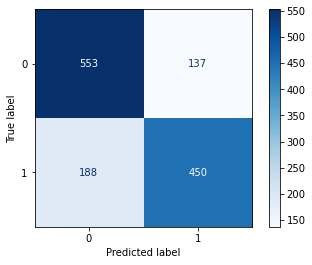

In [36]:
plot_confusion_matrix(etc, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()  

### GradientBoostingClassifier

In [37]:
gbc = GradientBoostingClassifier(random_state=123)
gbc.fit(X_train, y_train)
predictions_gbc = gbc.predict(X_test)
print('score =', accuracy_score(y_true = y_test, y_pred = predictions_gbc))

score = 0.7733433734939759


In [38]:
confusion_matrix(y_test, predictions_gbc)

array([[592,  98],
       [203, 435]], dtype=int64)

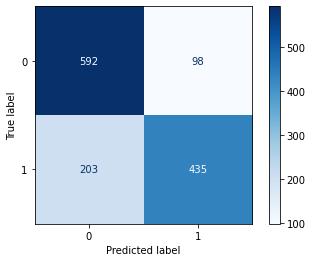

In [39]:
plot_confusion_matrix(gbc, X_test, y_test, cmap=plt.cm.Blues) 
plt.show() 